In [22]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt 

In [61]:
model = keras.models.load_model('./models/sonnenschein')
test = pd.read_csv("./python_datasets/test_data_hot_encoded.csv")[["kreditkarte", "bar", "check", "sex", "age"]]
y_test = pd.read_csv("./python_datasets/y_test.csv")[["was_canceled"]].squeeze()

In [60]:
#test = test[test["was_canceled"] == 1].reset_index(drop=True)
test

,kreditkarte,bar,check,sex,age
0,0.0,1.0,0.0,0,0.445946
1,1.0,0.0,0.0,0,0.500000
2,1.0,0.0,0.0,0,0.716216
3,1.0,0.0,0.0,0,0.432432
4,0.0,1.0,0.0,1,0.783784
...,...,...,...,...,...
193,1.0,0.0,0.0,1,0.837838
194,0.0,1.0,0.0,0,0.148649
195,0.0,1.0,0.0,0,0.405405
196,0.0,1.0,0.0,1,0.635135


In [54]:
#age_test = np.asarray(test["age"])
#sex_test = np.asarray(test["sex"].astype("int32"))
#payment_type_test = np.asarray(test["payment_type"].astype("int32"))
#X_Test = np.stack((age_test, sex_test, payment_type_test), axis=-1)
#y_test = (test['was_canceled']>0.1)
X_Test = test

In [62]:
y_test

0      False
1      False
2       True
3      False
4      False
       ...  
193     True
194    False
195     True
196     True
197     True
Name: was_canceled, Length: 198, dtype: bool

In [63]:
threshold_range = np.arange(0, 1, 0.01)
precision_list = []
predicitions = model.predict(X_Test)


threshold_list = []
real_label_list = []
for threshold in threshold_range:
    threshold_inner_list = []
    real_label_inner_list = []
    for i, pred in enumerate(predicitions):
        if (pred > threshold):
            threshold_inner_list.append(True)
            real_label_inner_list.append(y_test.iloc[i])
        else:
            threshold_inner_list.append(False)
            real_label_inner_list.append(y_test.iloc[i])
            
            
       
    threshold_list.append(threshold_inner_list)
    real_label_list.append(real_label_inner_list)

    
    
#y_test = list(y_test)
precision_list = []
for i, predicted_label in enumerate(threshold_list):
    precision = precision_score(list(real_label_list[i]), list(predicted_label), average="micro")
    
    precision_list.append(precision)

7/7 [==============================] - 0s 1ms/step


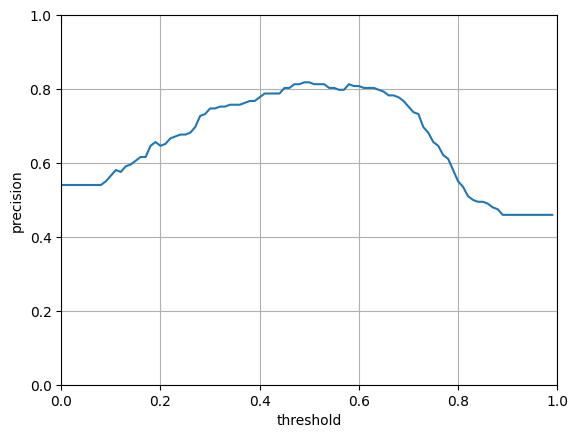

In [64]:
plt.plot(threshold_range, precision_list)
plt.ylabel('precision')
plt.xlabel('threshold')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()

7/7 [==============================] - 0s 1ms/step


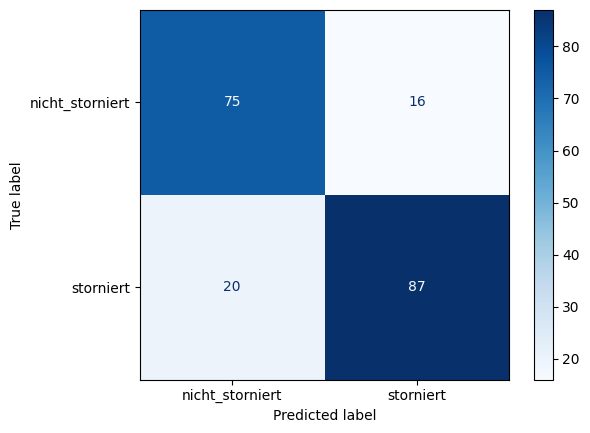

In [77]:



predicition = model.predict(X_Test)
y_predict = (predicition>0.5)


threshold_predict = []
threshold_real = []
for i, predict in enumerate(predicition):
    if predict > 0.63:
        threshold_predict.append(True)
        threshold_real.append(y_test.iloc[i])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['nicht_storniert','storniert'])

disp.plot(cmap=plt.cm.Blues)

plt.show()


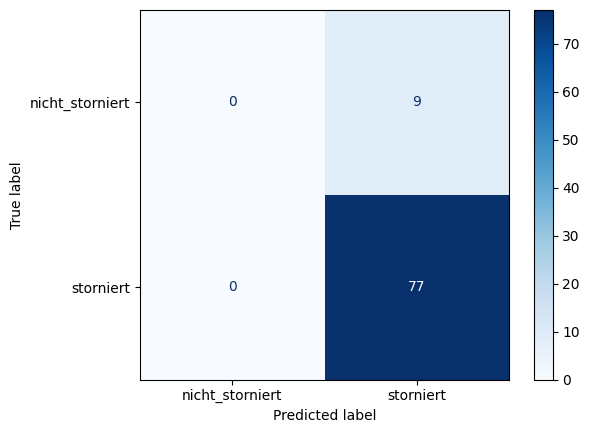

In [78]:



cm = confusion_matrix(threshold_real, threshold_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['nicht_storniert','storniert'])

disp.plot(cmap=plt.cm.Blues)

plt.show()

In [67]:
threshold_range = np.arange(0, 1, 0.01)

predicition = model.predict(X_Test)
y_predict = (predicition>0.5)

threshold_predicted_list = []
real_list = []
for threshold in threshold_range:
    pred = []
    true = []
    for i, predict in enumerate(predicition):
        if predict > threshold:
            pred.append(True)
            true.append(y_test.iloc[i])
    threshold_predicted_list.append(pred)
    real_list.append(true)

7/7 [==============================] - 0s 834us/step


In [71]:
result_list = []

for pred_list, true_list in zip(threshold_predicted_list, real_list):
    same = 0
    different = 0
    for pred, true in zip(pred_list, true_list):
        if pred == true:
            same += 1
        else:
            different += 1
    result_list.append([same, different])

In [72]:
same_list = []
difference_list = []
for result in result_list:
    same_list.append(result[0])
    difference_list.append(result[1])
    
    

In [73]:
ratio_list = []
for same, different in zip(same_list, difference_list):
    if same == 0 or different == 0:
        ratio_list.append(0)
        continue
    ratio_list.append(round((same/different), 4))

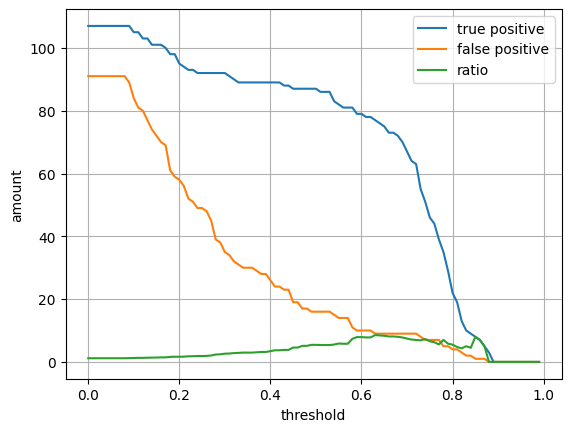

In [74]:
plt.plot(threshold_range, same_list, label="true positive")
plt.plot(threshold_range, difference_list, label="false positive")
plt.plot(threshold_range, ratio_list, label="ratio")
plt.ylabel('amount')
plt.xlabel('threshold')
plt.grid()
plt.legend(loc="upper right")

In [76]:
for i, ratio in enumerate(ratio_list):
    if ratio >= 8:
        print(ratio)
        print(i)

8.5556
63
8.4444
64
8.3333
65
8.1111
66
8.1111
67
8.0
68
8.0
85


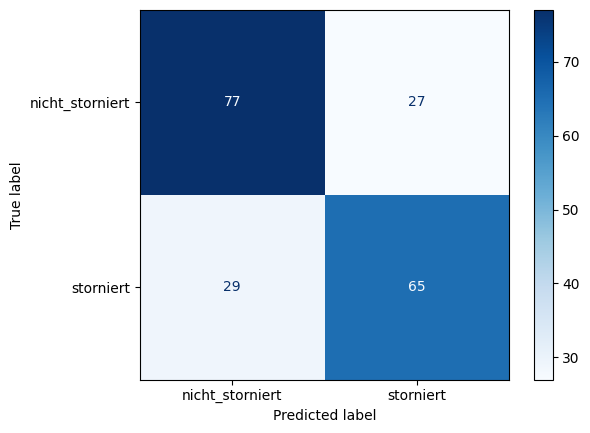

In [78]:
#Knime result
cm= np.ndarray((2,2), buffer=np.array([[77,27],[29,65]]),
           dtype=int)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['nicht_storniert','storniert'])

disp.plot(cmap=plt.cm.Blues)

plt.show()

In [79]:
#Precison: 0.707
#Recall: 0.691
#Accuracy: 0.717